## Predicting the Image by using Saved model

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

Initializing out autoencoder architecture

In [2]:
class autoencoder_model(nn.Module):
    def __init__(self):
        super(autoencoder_model, self).__init__()

        # Autoencoder architecture
        self.down1 = nn.Conv2d(1, 64, 3, stride=2)
        self.down2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.down3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
        self.down4 = nn.Conv2d(256, 512, 3, stride=2, padding=1)

        self.up1 = nn.ConvTranspose2d(512, 256, 3, stride=2, padding=1)
        self.up2 = nn.ConvTranspose2d(512, 128, 3, stride=2, padding=1)
        self.up3 = nn.ConvTranspose2d(256, 64, 3, stride=2, padding=1, output_padding=1)
        self.up4 = nn.ConvTranspose2d(128, 3, 3, stride=2, output_padding=1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        d1 = self.relu(self.down1(x))
        d2 = self.relu(self.down2(d1))
        d3 = self.relu(self.down3(d2))
        d4 = self.relu(self.down4(d3))

        u1 = self.relu(self.up1(d4))
        u2 = self.relu(self.up2(torch.cat((u1, d3), dim=1)))
        u3 = self.relu(self.up3(torch.cat((u2, d2), dim=1)))
        u4 = self.sigmoid(self.up4(torch.cat((u3, d1), dim=1)))

        return u4

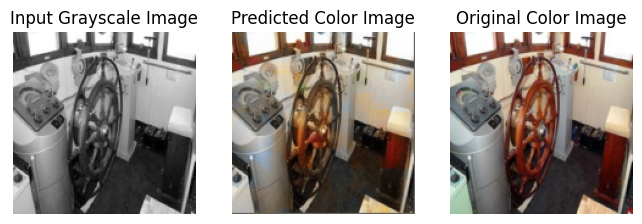

In [11]:
# Load the saved model
model = autoencoder_model()
# model.load_state_dict(torch.load('3_model_epoch_15.pth'))
model.load_state_dict(torch.load('models/model_epoch_100.pth'))

model.eval()

# Preprocess the input image
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

input_ori_path = 'predict_img/11.jpg'
input_gray = Image.open(input_ori_path).convert('L')  # Convert to grayscale
input_gray = transform(input_gray).unsqueeze(0)  # Add batch dimension

original_color = Image.open(input_ori_path)
original_color = transform(original_color).unsqueeze(0) 

# Make prediction
with torch.no_grad():
    predicted_color = model(input_gray)

# Visualize the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(input_gray.squeeze().numpy(), cmap='gray')
plt.title('Input Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(predicted_color.squeeze().permute(1, 2, 0).numpy())
plt.title('Predicted Color Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(original_color.squeeze().permute(1, 2, 0).numpy())
plt.title('Original Color Image')
plt.axis('off')

plt.show()